In [1]:
# import torch
from torch import FloatTensor, is_tensor
from hotgrad.functions import layers, activations, losses, operands
from torch.nn import CrossEntropyLoss
from torch.autograd import Variable as tVariable

In [2]:
#generalLoss = MSELoss()
#generalLoss
crossEntropy = CrossEntropyLoss()

In [3]:
mse_loss = losses.MSE()
mse_loss

In [4]:
randomTensor1, randomTensor2 = Tensor(3,1).normal_(), Tensor(3,1).normal_()
randomTensor1, randomTensor2
mse_loss.forward(randomTensor1, randomTensor2)


 0.1327
[torch.FloatTensor of size 1]

In [5]:
#(randomTensor1 - randomTensor2).pow(2).mean(0), mse_loss.forward(randomTensor1, randomTensor2), generalLoss(Variable(randomTensor1), Variable(randomTensor2))

In [6]:
#Variable((3, 4)), Tensor((3, 4))
tensor = Tensor(20,5)
linearModule = linear.Linear(5, 4)

In [15]:
linearModule.weight


 8.5616e+12  4.5636e-41 -4.5888e+05  3.0798e-41
 3.3129e-18  7.2646e+22  7.2250e+28  2.5226e-18
 2.3877e-18  2.6302e+20  6.1949e-04  2.5640e-09
 1.6408e-07  3.0957e+12  6.9363e-07  2.5790e-09
 2.6659e-09  1.2610e+16  5.4916e-34  1.5411e-31
[variable.Variable of size 5x4]

In [20]:
t = randomTensor1.clone()

In [21]:
t += 10

In [47]:
(-(Tensor(t.size()).fill_(1) * Tensor(t.size()).fill_(3))).exp()


1.00000e-02 *
  4.9787
  4.9787
  4.9787
[torch.FloatTensor of size 3x1]

In [45]:
from math import exp
t.exp()


 1.0000e+00
 1.0000e+00
 1.3456e+09
[torch.FloatTensor of size 3x1]

### Test basic operators

### [python operators](https://docs.python.org/2/library/operator.html)

In [2]:
from hotgrad.variable import Variable
from torch import FloatTensor
from torch.autograd import Variable as tVariable

%load_ext autoreload
%autoreload 2

In [ ]:
# test multiplication
x = FloatTensor(1).random_(100)
y = FloatTensor(1).random_(100)

a = Variable(x, requires_grad=True)
b = Variable(y, requires_grad=True)
c = a*b
c.backward()

ta = tVariable(x, requires_grad=True)
tb = tVariable(y, requires_grad=True)
tc = ta*tb
tc.backward()

print(ta.grad, tb.grad)
print(a.grad, b.grad)

In [63]:
x = FloatTensor(2, 4).random_(100)
y = FloatTensor(2, 4).random_(100)
# print(x, y)

a = Variable(x, requires_grad=True)
b = Variable(y, requires_grad=True)
c = (a*b).mean()
c.backward()


ta = tVariable(x, requires_grad=True)
tb = tVariable(y, requires_grad=True)
tc = (ta*tb).mean()
tc.backward()

# print(ta.grad, tb.grad)
# print(a.grad, b.grad)
print(ta.grad.data == a.grad)
print(tb.grad.data == b.grad)


 1  1  1  1
 1  1  1  1
[torch.ByteTensor of size 2x4]


 1  1  1  1
 1  1  1  1
[torch.ByteTensor of size 2x4]



In [282]:
a = Variable(FloatTensor([2, 4]))
b = Variable(FloatTensor([10]))
c = a*b

c, c.previous_op

mul


(Variable containing:
  20
  40
 [torch.FloatTensor of size 2], Mul operator:
 
 ------ Left operand ------
 Variable containing:
  2
  4
 [torch.FloatTensor of size 2]
 --------------------------
 
 ------ Right operand ------
 Variable containing:
  10
 [torch.FloatTensor of size 1]
 --------------------------)

In [264]:
a = tVariable(FloatTensor([2, 5]), requires_grad=True)
b = tVariable(FloatTensor([10]), requires_grad=True)
c = a*b
c.mean().backward()
a.grad, b.grad

RuntimeError: grad can be implicitly created only for scalar outputs

In [3]:
a = Variable(FloatTensor([2]))
b = Variable(FloatTensor([10]))
a*b
a-b
a+b
a/b
a@b
a**4

sub
add
div
matmul
pow


In [12]:
# import torch
from torch import FloatTensor, is_tensor
from hotgrad.functions import layers, activations, losses, operands
from torch.nn import CrossEntropyLoss, MSELoss
from torch.autograd import Variable as tVariable

from hotgrad.variable import Variable
from torch import FloatTensor
from torch.autograd import Variable as tVariable
from hotgrad.functions.losses import MSE
from hotgrad.sequential import Sequential
from hotgrad.optimizers import SGD

my_mse = MSE()
mse_comp = MSELoss()
#%load_ext autoreload
#%autoreload 2

a = Variable(FloatTensor([1, 2, 6, 4]), requires_grad=True)
b = Variable(FloatTensor([2,3,4,5]), requires_grad=True)
# b = FloatTensor([2,3,4,5])
# b = 2
# c = a.pow(b)
# c = a ** b
#d = a.mse(b)
#d = my_mse.forward(a, b)
d = my_mse(a, b)
#d = c.mean()

a2 = tVariable(FloatTensor([1, 2, 6, 4]), requires_grad=True)
b2 = tVariable(FloatTensor([2, 3, 4, 5]))
c2 = a2.pow(b2)
d2 = mse_comp(a2, b2)
#d22 = c2.mean()

In [13]:
d.backward()
d2.backward()
d, d2, 

(Variable containing:
  1.7500
 [torch.FloatTensor of size 1], Variable containing:
  1.7500
 [torch.FloatTensor of size 1])

In [9]:
d2

Variable containing:
 1.6500
[torch.FloatTensor of size 1]

In [21]:
#input_grad = FloatTensor([1])
d.backward()
d2.backward()
#d.input

In [23]:
#d, d22, a.grad, a2.grad
d, d, a.grad, a2.grad

(Variable containing:
  1
 [torch.FloatTensor of size 1], Variable containing:
  1
 [torch.FloatTensor of size 1], 
 -0.5000
 -0.5000
 -0.5000
 -0.5000
 [torch.FloatTensor of size 4], Variable containing:
 -0.5000
 -0.5000
 -0.5000
 -0.5000
 [torch.FloatTensor of size 4])

In [12]:
asd = FloatTensor([1, 2, 6, 4])

In [15]:
asd.fill_(1)


 1
 1
 1
 1
[torch.FloatTensor of size 4]

In [4]:
loss = MSE()
optimizer = SGD()

#seq = Sequential(, loss, optimizer)

loss, optimizer

(MSE operator:
 
 ------ Left operand ------
 None
 --------------------------
 
 ------ Right operand ------
 None
 --------------------------, <hotgrad.optimizers.SGD at 0x7fe9e9c65cc0>)

In [28]:
from hotgrad.variable import Variable
from torch import FloatTensor
from hotgrad.sequential import Sequential
from hotgrad.functions.layers import Linear
from hotgrad.functions.activations import ReLU, Tanh
from hotgrad.functions.losses import MSE
from hotgrad.optimizers import SGD
import torch

from dataset_generator import generate_dataset

# generate the dataset
X_train, X_test, y_train, y_test = generate_dataset(1000, one_hot_encoding=True)
y_train.data = y_train.data*2-1
y_test.data = y_test.data*2-1

X_train.data = (X_train.data - X_train.data.mean())/X_train.data.std() 
X_test.data = (X_test.data - X_test.data.mean())/X_test.data.std()

X_all = Variable(torch.cat((X_train.data, X_test.data), 0))
y_all = Variable(torch.cat((y_train.data, y_test.data), 0))

# model: two input units, two output units, three hidden layers of 25 units
modules = [Linear(2,25), ReLU(), Linear(25,25), ReLU(), Linear(25,25), ReLU(), Linear(25,2)]
# model = Sequential([Linear(2,25), ReLU(), Linear(25,25), ReLU(), Linear(25,25), ReLU(), Linear(25,2)], MSE(), SGD(lr=0.01))

torch.manual_seed(4)
# model = Sequential([Linear(2,25, 4), ReLU(), Linear(25,25, 4), ReLU(), Linear(25,25, 4), ReLU(), Linear(25,2, 4), Tanh()], MSE(), SGD(lr=0.01))
model = Sequential([Linear(2,25), ReLU(), Linear(25,25), ReLU(), Linear(25,25), ReLU(), Linear(25,2), Tanh()], MSE(), SGD(lr=0.01))

# fitting the model
# model.fit(X_train, y_train, X_test, y_test, epochs=10)
model.cross_validate(X_all, y_all, epochs=10, verbose=True)

----------------- fold 1/4 -----------------
Epoch 0: Train loss: 1.7221800088882446. Train accuracy 0.50%. 
Epoch 1: Train loss: 1.7101560831069946. Train accuracy 0.50%. 
Epoch 2: Train loss: 1.6974973678588867. Train accuracy 0.50%. 
Epoch 3: Train loss: 1.684207558631897. Train accuracy 0.50%. 
Epoch 4: Train loss: 1.670312523841858. Train accuracy 0.50%. 
Epoch 5: Train loss: 1.6558458805084229. Train accuracy 0.50%. 
Epoch 6: Train loss: 1.640859603881836. Train accuracy 0.50%. 
Epoch 7: Train loss: 1.6254531145095825. Train accuracy 0.50%. 
Epoch 8: Train loss: 1.609761357307434. Train accuracy 0.50%. 
Epoch 9: Train loss: 1.5939304828643799. Train accuracy 0.50%. 
----------------- fold 1/4 -----------------
Epoch 0: Train loss: 1.25308358669281. Train accuracy 0.34%. 
Epoch 1: Train loss: 1.2194130420684814. Train accuracy 0.35%. 
Epoch 2: Train loss: 1.1880013942718506. Train accuracy 0.37%. 
Epoch 3: Train loss: 1.1592906713485718. Train accuracy 0.39%. 
Epoch 4: Train loss:

{'test_score': [0.476, 0.386, 0.508, 0.518],
 'train_score': [0.498, 0.404, 0.5073333333333333, 0.484]}

In [67]:
y_train

Variable containing:
   -1     1
   -1     1
   -1     1
     ⋮      
    1    -1
    1    -1
    1    -1
[torch.FloatTensor of size 1000x2]

In [4]:
(model.predict(X_test).type(FloatTensor) == (y_test.data[:, 1]==1).type(FloatTensor)).type(FloatTensor).mean()

0.639

In [7]:
model.forward(X_test)

Variable containing:
 1.0000 -0.9895
 1.0000 -0.9999
 1.0000 -1.0000
       ⋮        
 1.0000 -0.9923
 1.0000 -1.0000
 1.0000  1.0000
[torch.FloatTensor of size 1000x2]

In [48]:
output = model.forward(X_train)
loss = model.loss_criterion(output, y_train)
model.zero_grad()
loss.backward()
before = list(map(lambda x: x.data.clone(), model.params()))
model.optimizer.step()
after = model.params()

backward of MatMul
backward of MatMul
backward of MatMul
backward of MatMul


In [10]:
true_classes = y_train.data.max(1)[1] if y_train.data.dim() == 2 else y_train.data
predicted = model.predict(X_train)

In [60]:
import math
import numpy as np
import matplotlib.pylab as plt
# import dlc_bci as bci
from types import SimpleNamespace 

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# baselines
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import torch 
from torch.nn import Conv2d, Linear, functional, Module, CrossEntropyLoss
from torch import Tensor
from torch.autograd import Variable
from torch.optim import Adam
import torch.nn.functional as F

import matplotlib.pylab as plt

def plot_scores(param, paramName, tr_scores, va_scores, log_scale=False):
    plt.figure(figsize=(7, 5))
    plt.grid()
    plt.plot(param, tr_scores)
    plt.plot(param, va_scores)
    plt.legend(['train', 'validation'])
    plt.xlabel(paramName)
    plt.ylabel('Accuracy')
    if log_scale:
        plt.xscale('log')

## Baselines:

### Logistic regression

Best lambda: 1e-06
Test score: 0.49


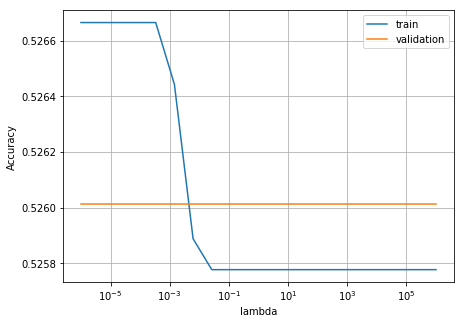

In [62]:
import numpy as np

lambdas = np.logspace(-6, 6, 20) # grid search on a parameter of the model

# here we store all the scores obtained with the different lambdas
logreg = {
    "tr_scores": [],
    "va_scores": []
}

for lambda_ in lambdas:
    result = cross_validate(LogisticRegression(C=lambda_), X_train.data.numpy(), (y_train.data == 1)[:, 1].numpy(), cv=10, return_train_score=True)
    
    logreg["tr_scores"].append(np.mean(result["train_score"]))
    logreg["va_scores"].append(np.mean(result["test_score"]))
    
plot_scores(lambdas, "lambda", logreg["tr_scores"], logreg["va_scores"], log_scale=True)

best_lambda = lambdas[np.argmax(logreg["va_scores"])]
print('Best lambda:', best_lambda)
print('Test score:', 
      LogisticRegression(C=best_lambda)
      .fit(X_train.data.numpy(), (y_train.data == 1)[:, 1].numpy())
      .score(X_test.data.numpy(), (y_test.data == 1)[:, 1].numpy()))